# PyTorch Basics

This notebook covers the fundamental concepts of PyTorch, including tensors, operations, and computational graphs.

In [40]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.1.2+cu121


## 1. Tensors

Tensors are the fundamental data structure in PyTorch, similar to NumPy arrays but with additional capabilities like GPU acceleration and automatic differentiation.

### 1.1 Creating Tensors

In [41]:
# Create a tensor from a Python list
x = torch.tensor([1, 2, 3, 4])
print(f"Tensor from list: {x}")

# Create a 2D tensor (matrix)
matrix = torch.tensor([[1, 2], [3, 4]])
print(f"\nMatrix:\n{matrix}")

# Create tensors with specific data types
float_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
int_tensor = torch.tensor([1, 2, 3], dtype=torch.int64)
print(f"\nFloat tensor: {float_tensor}")
print(f"Integer tensor: {int_tensor}")

Tensor from list: tensor([1, 2, 3, 4])

Matrix:
tensor([[1, 2],
        [3, 4]])

Float tensor: tensor([1., 2., 3.])
Integer tensor: tensor([1, 2, 3])


In [42]:
# Create tensors with specific shapes
zeros = torch.zeros(3, 4)
ones = torch.ones(2, 3)
rand = torch.rand(2, 2)  # Uniform distribution [0, 1)
randn = torch.randn(2, 2)  # Normal distribution (mean=0, std=1)

print(f"Zeros tensor:\n{zeros}")
print(f"\nOnes tensor:\n{ones}")
print(f"\nRandom uniform tensor:\n{rand}")
print(f"\nRandom normal tensor:\n{randn}")

Zeros tensor:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Ones tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random uniform tensor:
tensor([[0.0874, 0.0807],
        [0.6629, 0.7828]])

Random normal tensor:
tensor([[-0.4919,  0.1951],
        [ 0.3351,  1.4834]])


In [43]:
# Create a tensor with a specific range
range_tensor = torch.arange(0, 10, step=1)
linspace = torch.linspace(0, 1, steps=5)
print(f"Range tensor: {range_tensor}")
print(f"Linspace tensor: {linspace}")

# Create an identity matrix
eye = torch.eye(3)
print(f"\nIdentity matrix:\n{eye}")

Range tensor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Linspace tensor: tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])

Identity matrix:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


### 1.2 Tensor Attributes

In [44]:
x = torch.randn(3, 4, 5)

print(f"Tensor shape: {x.shape}")
print(f"Tensor size: {x.size()}")
print(f"Number of dimensions: {x.dim()}")
print(f"Data type: {x.dtype}")
print(f"Device: {x.device}")

Tensor shape: torch.Size([3, 4, 5])
Tensor size: torch.Size([3, 4, 5])
Number of dimensions: 3
Data type: torch.float32
Device: cpu


### 1.3 Tensor Indexing and Slicing

In [45]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f"Original tensor:\n{x}")

# Indexing
print(f"\nIndexing:")
print(f"x[0, 0] = {x[0, 0]}")
print(f"x[1, 2] = {x[1, 2]}")

# Slicing
print(f"\nSlicing:")
print(f"First column:\n{x[:, 0]}")
print(f"Second row:\n{x[1, :]}")
print(f"Sub-matrix (top-right 2x2):\n{x[0:2, 1:3]}")

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Indexing:
x[0, 0] = 1
x[1, 2] = 6

Slicing:
First column:
tensor([1, 4, 7])
Second row:
tensor([4, 5, 6])
Sub-matrix (top-right 2x2):
tensor([[2, 3],
        [5, 6]])


In [46]:
# Advanced indexing
indices = torch.tensor([0, 2])
print(f"Advanced indexing with indices [0, 2]:\n{x[indices]}")

# Boolean indexing
mask = x > 5
print(f"\nBoolean mask (x > 5):\n{mask}")
print(f"Elements where x > 5:\n{x[mask]}")

Advanced indexing with indices [0, 2]:
tensor([[1, 2, 3],
        [7, 8, 9]])

Boolean mask (x > 5):
tensor([[False, False, False],
        [False, False,  True],
        [ True,  True,  True]])
Elements where x > 5:
tensor([6, 7, 8, 9])


## 2. Tensor Operations

PyTorch provides a wide range of operations for manipulating tensors.

### 2.1 Arithmetic Operations

In [47]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

print(f"a = {a}")
print(f"b = {b}")

# Addition
print(f"a + b = {a + b}")
print(f"torch.add(a, b) = {torch.add(a, b)}")

# Subtraction
print(f"a - b = {a - b}")
print(f"torch.sub(a, b) = {torch.sub(a, b)}")

# Multiplication (element-wise)
print(f"a * b = {a * b}")
print(f"torch.mul(a, b) = {torch.mul(a, b)}")

# Division (element-wise)
print(f"a / b = {a / b}")
print(f"torch.div(a, b) = {torch.div(a, b)}")

a = tensor([1, 2, 3])
b = tensor([4, 5, 6])
a + b = tensor([5, 7, 9])
torch.add(a, b) = tensor([5, 7, 9])
a - b = tensor([-3, -3, -3])
torch.sub(a, b) = tensor([-3, -3, -3])
a * b = tensor([ 4, 10, 18])
torch.mul(a, b) = tensor([ 4, 10, 18])
a / b = tensor([0.2500, 0.4000, 0.5000])
torch.div(a, b) = tensor([0.2500, 0.4000, 0.5000])


In [48]:
# In-place operations (modifies the tensor)
c = torch.tensor([1, 2, 3])
print(f"Original c = {c}")

c.add_(b)  # Note the underscore suffix for in-place operations
print(f"After c.add_(b), c = {c}")

Original c = tensor([1, 2, 3])
After c.add_(b), c = tensor([5, 7, 9])


### 2.2 Matrix Operations

In [49]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

print(f"Matrix a:\n{a}")
print(f"Matrix b:\n{b}")

# Matrix multiplication
print(f"\nMatrix multiplication (torch.matmul(a, b)):\n{torch.matmul(a, b)}")
print(f"Matrix multiplication (a @ b):\n{a @ b}")

# Element-wise multiplication
print(f"\nElement-wise multiplication (a * b):\n{a * b}")

# Transpose
print(f"\nTranspose of a:\n{a.t()}")

Matrix a:
tensor([[1, 2],
        [3, 4]])
Matrix b:
tensor([[5, 6],
        [7, 8]])

Matrix multiplication (torch.matmul(a, b)):
tensor([[19, 22],
        [43, 50]])
Matrix multiplication (a @ b):
tensor([[19, 22],
        [43, 50]])

Element-wise multiplication (a * b):
tensor([[ 5, 12],
        [21, 32]])

Transpose of a:
tensor([[1, 3],
        [2, 4]])


In [50]:
# Determinant
print(f"Determinant of a: {torch.det(a.float())}")

# Inverse
print(f"Inverse of a:\n{torch.inverse(a.float())}")

Determinant of a: -2.0
Inverse of a:
tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]])


### 2.3 Reduction Operations

In [51]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"Tensor x:\n{x}")

# Sum
print(f"\nSum of all elements: {torch.sum(x)}")
#这里注意是规约到哪个维度的意思，dim=0是行，dim=1是列，规约到行就只剩下行。
print(f"Sum along rows (dim=0): {x.sum(dim=0)}")
print(f"Sum along columns (dim=1): {x.sum(dim=1)}")

# Mean
print(f"\nMean of all elements: {torch.mean(x.float())}")
print(f"Mean along rows (dim=0): {x.float().mean(dim=0)}")
print(f"Mean along columns (dim=1): {x.float().mean(dim=1)}")

Tensor x:
tensor([[1, 2, 3],
        [4, 5, 6]])

Sum of all elements: 21
Sum along rows (dim=0): tensor([5, 7, 9])
Sum along columns (dim=1): tensor([ 6, 15])

Mean of all elements: 3.5
Mean along rows (dim=0): tensor([2.5000, 3.5000, 4.5000])
Mean along columns (dim=1): tensor([2., 5.])


In [52]:
# Max and Min
print(f"Max of all elements: {torch.max(x)}")
max_values, max_indices = x.max(dim=0)
print(f"Max along rows (dim=0): values={max_values}, indices={max_indices}")
print(f"Min of all elements: {torch.min(x)}")

# Product
print(f"Product of all elements: {torch.prod(x)}")

Max of all elements: 6
Max along rows (dim=0): values=tensor([4, 5, 6]), indices=tensor([1, 1, 1])
Min of all elements: 1
Product of all elements: 720


### 2.4 Reshaping Operations

In [53]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"Original tensor x:\n{x}")

# Reshape
print(f"\nReshape to (3, 2):\n{x.reshape(3, 2)}")

# View (shares the same data with the original tensor)
print(f"\nView as (6, 1):\n{x.view(6, 1)}")

# Flatten
print(f"\nFlatten: {x.flatten()}")

Original tensor x:
tensor([[1, 2, 3],
        [4, 5, 6]])

Reshape to (3, 2):
tensor([[1, 2],
        [3, 4],
        [5, 6]])

View as (6, 1):
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

Flatten: tensor([1, 2, 3, 4, 5, 6])


In [54]:
# Permute dimensions
y = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])  # Shape: (2, 2, 2)
print(f"Original tensor y with shape {y.shape}:\n{y}")
#这里注意x.permute(2, 0, 1)是合法的，但是torch.permute(x)是不合法的, torch.trnaspose(x)也是合法的,X.transpose(2,0,1)也是合法的

#变化原理首先从数值和变化去理解，不要从形状理解

# 原索引 (0, 0, 0)，值为 1

# 在 permute(2, 0, 1) 后：

# 原 dim=0 → 新 dim=1

# 原 dim=1 → 新 dim=2

# 原 dim=2 → 新 dim=0

# 所以新索引就是 (0, 0, 0) → 对应值仍为 1

# 再看另一个：

# 原索引 (1, 1, 0)，值为 7
# → 新索引：

# dim=2 → dim=0 → 0

# dim=0 → dim=1 → 1

# dim=1 → dim=2 → 1

# 变成 (0, 1, 1)，值是 7 ✔️

#两者的区别
# 比项	transpose	permute
# 支持维度交换	只能交换 2 个	可交换任意多个维度
# 是否改变数据	都不拷贝数据（只改变视图）	都是 zero-copy 操作
# 是否会导致 .view() 报错	有可能（内存不连续）	更容易触发，通常需要 .contiguous()
# 通常使用场景	图像 (B, C, H, W) ↔ (B, H, W, C) 等	RNN、Transformer 等高维结构变换

print(f"\nPermute dimensions (2, 0, 1) with shape {y.permute(2, 0, 1).shape}:\n{y.permute(2, 0, 1)}")

# Squeeze and Unsqueeze
z = torch.tensor([[[1], [2]]])  # Shape: (1, 2, 1)
print(f"\nOriginal tensor z with shape {z.shape}:\n{z}")
print(f"Squeeze z with shape {z.squeeze().shape}: {z.squeeze()}")
#这个下标的意思是要移除哪个轴
print(f"Squeeze dimension 0 with shape {z.squeeze(0).shape}:\n{z.squeeze(0)}")
print(f"Unsqueeze x at dimension 0 with shape {torch.unsqueeze(x, 0).shape}:\n{torch.unsqueeze(x, 0)}")

Original tensor y with shape torch.Size([2, 2, 2]):
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

Permute dimensions (2, 0, 1) with shape torch.Size([2, 2, 2]):
tensor([[[1, 3],
         [5, 7]],

        [[2, 4],
         [6, 8]]])

Original tensor z with shape torch.Size([1, 2, 1]):
tensor([[[1],
         [2]]])
Squeeze z with shape torch.Size([2]): tensor([1, 2])
Squeeze dimension 0 with shape torch.Size([2, 1]):
tensor([[1],
        [2]])
Unsqueeze x at dimension 0 with shape torch.Size([1, 2, 3]):
tensor([[[1, 2, 3],
         [4, 5, 6]]])


## 3. NumPy Integration

PyTorch provides seamless integration with NumPy, allowing you to convert between PyTorch tensors and NumPy arrays.

In [55]:
# Convert NumPy array to PyTorch tensor
np_array = np.array([1, 2, 3])
tensor = torch.from_numpy(np_array)
print(f"NumPy array: {np_array}")
print(f"PyTorch tensor from NumPy: {tensor}")

# Convert PyTorch tensor to NumPy array
tensor = torch.tensor([4, 5, 6])
np_array = tensor.numpy()
print(f"\nPyTorch tensor: {tensor}")
print(f"NumPy array from tensor: {np_array}")

NumPy array: [1 2 3]
PyTorch tensor from NumPy: tensor([1, 2, 3])

PyTorch tensor: tensor([4, 5, 6])
NumPy array from tensor: [4 5 6]


In [56]:
#转换后他们是共享的
# Shared memory demonstration
np_array = np.array([1, 2, 3])
tensor = torch.from_numpy(np_array)
print(f"Original NumPy array: {np_array}")
print(f"Original tensor: {tensor}")

np_array[0] = 5
print(f"\nModified NumPy array: {np_array}")
print(f"Tensor after NumPy modification: {tensor}")

Original NumPy array: [1 2 3]
Original tensor: tensor([1, 2, 3])

Modified NumPy array: [5 2 3]
Tensor after NumPy modification: tensor([5, 2, 3])


## 4. GPU Acceleration

One of the key features of PyTorch is its ability to leverage GPU acceleration for faster computations.

In [57]:
# Check if CUDA (NVIDIA GPU) is available
cuda_available = torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")

# Create tensors on CPU or GPU
if cuda_available:
    device = torch.device("cuda")
    print("Using CUDA device")
    
    # Create tensor directly on GPU
    x_gpu = torch.tensor([1, 2, 3], device=device)
    print(f"Tensor created on GPU: {x_gpu}")
    
    # Move tensor from CPU to GPU
    x_cpu = torch.tensor([4, 5, 6])
    x_gpu = x_cpu.to(device)
    print(f"Tensor moved from CPU to GPU: {x_gpu}")
    
    # Move tensor back to CPU
    x_cpu_again = x_gpu.cpu()
    print(f"Tensor moved back to CPU: {x_cpu_again}")
else:
    print("CUDA not available. Using CPU only.")
    device = torch.device("cpu")
    x = torch.tensor([1, 2, 3])
    print(f"Tensor on CPU: {x}")

CUDA available: True
Using CUDA device
Tensor created on GPU: tensor([1, 2, 3], device='cuda:0')
Tensor moved from CPU to GPU: tensor([4, 5, 6], device='cuda:0')
Tensor moved back to CPU: tensor([4, 5, 6])


## 5. Computational Graphs

PyTorch uses a dynamic computational graph, which means the graph is built on-the-fly as operations are executed.

In [58]:
# Create tensors with requires_grad=True to track operations
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

print(f"x = {x}")
print(f"y = {y}")

# Build a computational graph
z = x**2 + y**3
print(f"z = x^2 + y^3 = {z}")

# Compute gradients
z.backward()

# Access gradients
print(f"Gradient of z with respect to x (dz/dx): {x.grad}")
print(f"Gradient of z with respect to y (dz/dy): {y.grad}")

x = 2.0
y = 3.0
z = x^2 + y^3 = 31.0
Gradient of z with respect to x (dz/dx): 4.0
Gradient of z with respect to y (dz/dy): 27.0


In [59]:
#这里主要讲梯度是累加的
# pyTorch 中 .backward() 会覆盖 .grad 吗？	❌ 不会，它是累加的
# 为什么是累加？	为了支持梯度累加训练（模拟大 batch）
# 如何手动清除旧梯度？	用 .grad.zero_() 或 optimizer.zero_grad()
# 如果忘记清零，会出什么错？	梯度不断累积，导致参数更新过大，模型不收敛

# Gradient accumulation
print("Gradient accumulation:")

# Reset gradients
x.grad.zero_()
y.grad.zero_()
print(f"After zeroing gradients:")
print(f"x.grad = {x.grad}")
print(f"y.grad = {y.grad}")

# Compute gradients multiple times
z = x**2 + y**3
z.backward()
print(f"\nAfter first backward pass:")
print(f"x.grad = {x.grad}")

z = x**2 + y**3
z.backward()
print(f"\nAfter second backward pass (gradients are accumulated):")
print(f"x.grad = {x.grad}")

Gradient accumulation:
After zeroing gradients:
x.grad = 0.0
y.grad = 0.0

After first backward pass:
x.grad = 4.0

After second backward pass (gradients are accumulated):
x.grad = 8.0


In [60]:
# Detach a tensor from the graph
a = x.detach()
print(f"Detached tensor a = {a}")
print(f"a.requires_grad = {a.requires_grad}")

Detached tensor a = 2.0
a.requires_grad = False


## 6. Visualization Example

Let's visualize a simple function and its gradient using PyTorch.

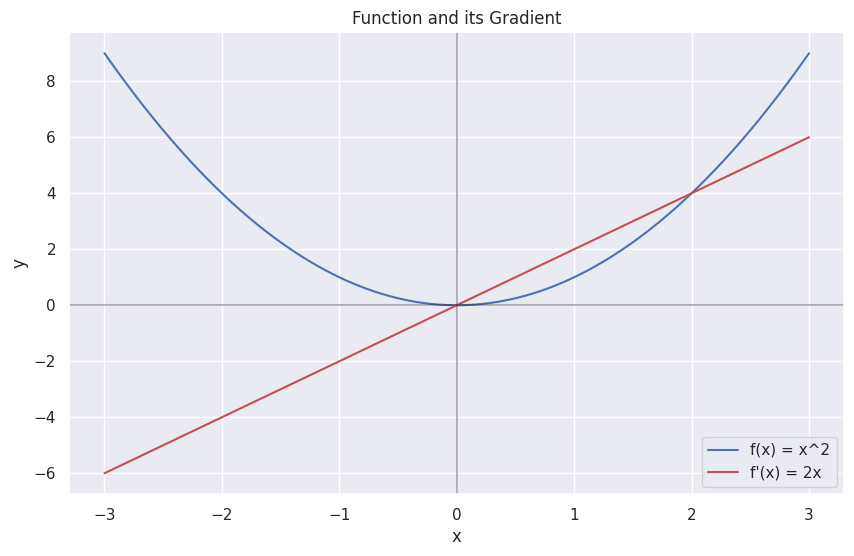

In [61]:
# Create a range of x values
x_range = torch.linspace(-3, 3, 100, requires_grad=True)

# Define a function: f(x) = x^2
y = x_range**2

# Compute gradients for each x value
gradients = []
for i in range(len(x_range)):
    if x_range.grad is not None:
        x_range.grad.zero_()
    y_i = x_range[i]**2
    y_i.backward(retain_graph=True)
    gradients.append(x_range.grad[i].item())

# Convert to NumPy for plotting
x_np = x_range.detach().numpy()
y_np = y.detach().numpy()
gradients_np = np.array(gradients)

# Plot the function and its gradient
plt.figure(figsize=(10, 6))
plt.plot(x_np, y_np, 'b-', label='f(x) = x^2')
plt.plot(x_np, gradients_np, 'r-', label="f'(x) = 2x")
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and its Gradient')
plt.legend()
plt.show()

## 7. 🔍 PyTorch 中的 `contiguous()` 可视化与练习

本 notebook 用于帮助理解 `contiguous()` 的含义、为什么某些操作后张量不是连续的、以及 `.view()` 报错的常见原因。

In [62]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()
torch.__version__

'2.1.2+cu121'

### 🧩 Step 1: 创建一个简单二维张量


In [63]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
print("Original Tensor x:")
print(x)
print(f"Shape: {x.shape}, is_contiguous: {x.is_contiguous()}")
print(f"Stride: {x.stride()}")

Original Tensor x:
tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3]), is_contiguous: True
Stride: (3, 1)


### 🔁 Step 2: Transpose 后的张量，是否连续？

不连续的原因是它并没有改变内存排序，所以就是是跳跃着取数的，是不连续的

In [64]:
x_t = x.transpose(0, 1)
print("\nTransposed Tensor x_t:")
print(x_t)
print(f"Shape: {x_t.shape}, is_contiguous: {x_t.is_contiguous()}")
print(f"Stride: {x_t.stride()}")


Transposed Tensor x_t:
tensor([[1, 4],
        [2, 5],
        [3, 6]])
Shape: torch.Size([3, 2]), is_contiguous: False
Stride: (1, 3)


### ❌ Step 3: 尝试对转置张量使用 `.view()`

In [65]:
try:
    print(x_t.view(-1))
except RuntimeError as e:
    print(f"Error: {e}")

Error: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.


### ✅ Step 4: 使用 `.contiguous()` 让内存变连续后再 view


In [66]:
x_c = x_t.contiguous()
print(f"After contiguous: is_contiguous: {x_c.is_contiguous()}")
print(f"Stride: {x_c.stride()}")
print("view as 1D:", x_c.view(-1))

After contiguous: is_contiguous: True
Stride: (2, 1)
view as 1D: tensor([1, 4, 2, 5, 3, 6])


## 8. torch 的广播机制

广播机制的本质是在缺少的维度上进行复制，然后进行运算。

In [81]:
x = torch.zeros(3, 1, 5)
y = torch.rand(1,4,1)
print(f"x.shape = {x.shape}\n,x = {x}")
print(f"y.shape = {y.shape}\n,y = {y}")
z = x + y
print(f"x + y = {z}")
print(f"x + y = {z}")


x.shape = torch.Size([3, 1, 5])
,x = tensor([[[0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.]]])
y.shape = torch.Size([1, 4, 1])
,y = tensor([[[0.0275],
         [0.5113],
         [0.4481],
         [0.4925]]])
x + y = tensor([[[0.0275, 0.0275, 0.0275, 0.0275, 0.0275],
         [0.5113, 0.5113, 0.5113, 0.5113, 0.5113],
         [0.4481, 0.4481, 0.4481, 0.4481, 0.4481],
         [0.4925, 0.4925, 0.4925, 0.4925, 0.4925]],

        [[0.0275, 0.0275, 0.0275, 0.0275, 0.0275],
         [0.5113, 0.5113, 0.5113, 0.5113, 0.5113],
         [0.4481, 0.4481, 0.4481, 0.4481, 0.4481],
         [0.4925, 0.4925, 0.4925, 0.4925, 0.4925]],

        [[0.0275, 0.0275, 0.0275, 0.0275, 0.0275],
         [0.5113, 0.5113, 0.5113, 0.5113, 0.5113],
         [0.4481, 0.4481, 0.4481, 0.4481, 0.4481],
         [0.4925, 0.4925, 0.4925, 0.4925, 0.4925]]])
x + y = tensor([[[0.0275, 0.0275, 0.0275, 0.0275, 0.0275],
         [0.5113, 0.5113, 0.5113, 0.5113, 0.5113],
         [0.4

## 9.einsum in PyTorch
这个虽然使用方便，但是他没有像transpose等一样经过优化。比如blas

### ✅ 示例 1：Batch 矩阵乘法（简化 BMM）

In [90]:
#矩阵相乘
x = torch.randn(10, 5)
y = torch.randn(5, 4)
out1 = torch.matmul(x, y)
out2 = torch.einsum('ij,jk->ik', x, y)
print(f"x * y = {out1}")
print(f"ij,jk->ik = {out2}")

#batch 矩阵相乘
a = torch.randn(10, 3, 4)  # batch = 10, A: [3×4]
b = torch.randn(10, 4, 5)  # batch = 10, B: [4×5]
out = torch.einsum('bij,bjk->bik', a, b)




x * y = tensor([[ 0.9745,  2.8472, -3.4511, -0.8598],
        [ 4.7670,  4.5389, -0.4586, -0.0998],
        [-6.8586, -5.1635, -3.1384,  5.0055],
        [ 2.8970, -0.7192,  4.3209, -2.5301],
        [-3.2186, -1.9910, -1.0683,  2.2921],
        [-0.3722,  1.3037, -2.2153,  0.8561],
        [ 2.7596,  1.6899,  0.4614, -2.4356],
        [ 2.2115,  0.6339,  1.6592, -2.9178],
        [-3.1783, -1.5980, -2.6014,  2.2551],
        [-2.0502, -1.4851, -1.6641,  0.8471]])
ij,jk->ik = tensor([[ 0.9745,  2.8472, -3.4511, -0.8598],
        [ 4.7670,  4.5389, -0.4586, -0.0998],
        [-6.8586, -5.1635, -3.1384,  5.0055],
        [ 2.8970, -0.7192,  4.3209, -2.5301],
        [-3.2186, -1.9910, -1.0683,  2.2921],
        [-0.3722,  1.3037, -2.2153,  0.8561],
        [ 2.7596,  1.6899,  0.4614, -2.4356],
        [ 2.2115,  0.6339,  1.6592, -2.9178],
        [-3.1783, -1.5980, -2.6014,  2.2551],
        [-2.0502, -1.4851, -1.6641,  0.8471]])
a = tensor([1.4838, 2.0109, 2.4800])
b = tensor([ 0.8386, 

### ✅ 示例 2与3：向量的内、外积

In [ ]:
#向量的内积
#在 PyTorch 中，向量的内积（dot product） 是一种基本的张量操作，表示两个向量对应位置元素乘积的总和，形式为：
# dot(𝑎,𝑏)=∑i 𝑎𝑖 ⋅ 𝑏𝑖
a = torch.randn(5)
b = torch.randn(5)
# print(f"a = {a}")
# print(f"b = {b}")
# print(f"a * b = {torch.dot(a, b)}")
out = torch.einsum('i,i->', a, b)
# print(f"i,i-> = {out}")

#向量的外积
a = torch.randn(3)
b = torch.randn(4)
print(f"a = {a}")
print(f"b = {b}")
print(f"a.shape = {a.shape}")
print(f"b.shape = {b.shape}")
out = torch.einsum('i,j->ij', a, b)
# a.unsqueeze(1) 把 a 变成 [3, 1]；

# b 是 [4]，在乘法中自动广播成 [1, 4]；

# 二者按广播规则扩展为 [3, 4] 后逐元素相乘；
print(f"a.unsqueeze(1) * b = {a.unsqueeze(1) * b}")
print(f"i,j->ij = {out}")




### ✅ 示例 4：加权求和（Weighted Sum）

In [92]:

values = torch.tensor([[1., 2., 3.],
                       [4., 5., 6.]])    # shape (2, 3)
weights = torch.tensor([0.1, 0.2, 0.7])  # shape (3,)
out = torch.einsum('ij,j->i', values, weights)
print(f"values = {values}")
print(f"weights = {weights}")
print(f"out = {out}")

values = tensor([[1., 2., 3.],
        [4., 5., 6.]])
weights = tensor([0.1000, 0.2000, 0.7000])
out = tensor([2.6000, 5.6000])


### ✅ 示例 5：注意力机制核心操作（Query × Key

In [94]:
Q = torch.randn(2, 3, 4)  # [batch, heads, dim]
K = torch.randn(2, 4, 4)  # [batch, dim, seq_len]
scores = torch.einsum('bhd,bdk->bhk', Q, K)
print(scores.shape)
print(scores)
print(Q.shape)
print(K.shape)


torch.Size([2, 3, 4])
tensor([[[ 1.9971, -0.4477, -0.9091, -0.2580],
         [ 0.3112,  1.7160,  0.3975, -1.6764],
         [-1.0664, -4.3187, -2.1387, -2.8906]],

        [[ 0.2914,  0.5219, -3.1450, -4.9806],
         [ 0.1149,  1.1184, -1.3343, -3.4568],
         [ 0.1424,  0.7864, -1.0602, -1.0277]]])
torch.Size([2, 3, 4])
torch.Size([2, 4, 4])


### ✅ 示例 6：Transpose

In [95]:
A = torch.randn(3, 4, 5)
A_T = torch.einsum('ijk->ikj', A)  # 转置


## 10. gather and scatter

torch.gather 是 PyTorch 中一个非常有用的操作，它的作用是：根据给定的索引张量，从原始张量中“有选择性地”提取元素。它广泛用于排序、Top-K 筛选、序列处理、注意力机制等场景中。

In [98]:
scores = torch.tensor([[1.2, 2.4, 0.8],
                       [3.2, 1.1, 4.8]])
top2 = torch.topk(scores, 2, dim=1) #一行列，对列的方向进行操作，每一列的数组中取出前两个
print("tpk-2: ", top2)
indices = top2.indices
values = torch.gather(scores, 1, indices)
print("gather: ", values)


tpk-2:  torch.return_types.topk(
values=tensor([[2.4000, 1.2000],
        [4.8000, 3.2000]]),
indices=tensor([[1, 0],
        [2, 0]]))
gather:  tensor([[2.4000, 1.2000],
        [4.8000, 3.2000]])


## 11. .chunk()、.split() 与 .unfold() 的对比与使用说明

In [101]:
x = torch.arange(10)  # 生成一维张量 [0, 1, 2, ..., 9]
chunks = torch.chunk(x, 3)
#执行 torch.chunk(x, 3) 的含义是：将张量 x 尽可能平均地划分为 3 个子张量。由于原始张量长度为 10，不能被 3 整除
print(chunks)
windows = x.unfold(0, size=3, step=2)
print(windows)
split_res= x.split(3,0)
print(split_res)

(tensor([0, 1, 2, 3]), tensor([4, 5, 6, 7]), tensor([8, 9]))
tensor([[0, 1, 2],
        [2, 3, 4],
        [4, 5, 6],
        [6, 7, 8]])
(tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7, 8]), tensor([9]))


## 12.维度变化：Reshape, View, Squeeze, Unsqueeze, Permute 

In [103]:
# x.shape = (2, 3, 4, 5)

# .permute(0, 2, 3, 1) → shape: (2, 4, 5, 3)

# .reshape(2, 4, -1) → (2, 4, 15)

x = torch.randn(2, 3, 4, 5)
y = x.permute(0, 2, 3, 1).reshape(2, 4, -1)

print(y.shape)


torch.Size([2, 4, 15])


## 13. where/masked_fill/clamp

| 函数           | 功能                         | 输入              | 结果                          | 用途举例                           |
|----------------|------------------------------|-------------------|-------------------------------|------------------------------------|
| `torch.where`  | 条件选择（选择 a 或 b）      | condition, a, b   | shape 与 a/b 相同             | 缺失值处理、条件判断               |
| `masked_fill`  | 用标量填充 mask=True 的位置  | mask, value       | 替换指定元素为常量            | 屏蔽 attention 中无效 token        |
| `clamp`        | 限制取值范围                 | min, max          | 值控制在[min, max]范围内       | 值归一、限制异常梯度               |


In [105]:
x = torch.tensor([[float('nan'), -2.0, 0.5],
                  [3.0, 100.0, -100.0]])
print(x)

# 目标：先将 nan 替换为 0，然后将所有值限制在 [-1, 1]
x_clean = torch.where(torch.isnan(x), torch.zeros_like(x), x)
x_clamped = torch.clamp(x_clean, min=-1.0, max=1.0)
print(x_clamped)

x = torch.tensor([[1, 2], [3, 4]])
mask = torch.tensor([[False, True], [False, True]])
y = x.masked_fill(mask, -1)
print(y)



tensor([[      nan,   -2.0000,    0.5000],
        [   3.0000,  100.0000, -100.0000]])
tensor([[ 0.0000, -1.0000,  0.5000],
        [ 1.0000,  1.0000, -1.0000]])
tensor([[ 1, -1],
        [ 3, -1]])
